# Getting Started

The top of Python files should always be a short documentation about the
content of the file, or "docstring".

This ipyton notebook is short demonstration of Python for scientific data analysis

This script covers the following points:

* Plotting a sine wave
* Generating a column matrix of data
* Writing data to a text-file, and reading data from a text-file
* Waiting for a button-press to continue the program exectution
* Using a dictionary, which is similar to MATLAB structures
* Extracting data which fulfill a certain condition
* Calculating the best-fit-line to noisy data
* Formatting text-output
* Waiting for a keyboard-press
* Calculating confidence intervals for line-fits
* Saving figures

For such a short program, the definition of a "main" function, and calling
it by default when the module is imported by the main program, is a bit
superfluous. But it shows good Python coding style.

Author: Thomas Haslwanter, July-2015

# Modules and Packages

In [1]:
# To see the plots inline, even if you have not started the notebook 
# via "ipython notebook --pylab=inline"
% pylab inline

# In contrast to MATLAB, you explicitly have to load the modules that you need.
# And don't worry here about not knowing the right modules: numpy, scipy, and
# matplotlib is almost everything you will need most of the time, and you
# will quickly get used to those. The most important components from numpy and
# matplotlib are imported automatically by pylab.

Populating the interactive namespace from numpy and matplotlib


# Sine Wave

In [2]:
# Create a sine-wave
t = arange(0,10,0.1)
x = sin(t)

# Note: in contrast to MATLAB you have to specify where your commands come
# from(unless you used "from xxx import *")

# Save the data in a text-file, in column form
# The formatting is a bit clumsy: data are by default row variables; so to
# get a matrix, you stack the two rows above each other, and then transpose
# the matrix
outFile = 'test.txt'
savetxt(outFile, np.vstack([t,x]).T)

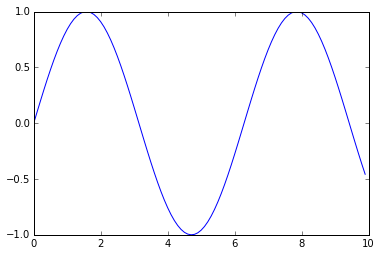

In [3]:
# Read the data into a different variable
inData = loadtxt(outFile)
t2 = inData[:,0] # Note that Python starts at "0"!
x2 = inData[:,1]

# Plot the data, and wait for the user to click
plot(t,sin(t))

# Noisy Data and Linefits

Fit the following function: $y = k*x + d$

In [4]:
# Generate a noisy line
t = arange(-100,100)
# use a Python "dictionary" for named variables
par = {'offset':100, 'slope':0.5, 'noiseAmp':4}
x = par['offset'] + par['slope']*t + par['noiseAmp']*randn(len(t))

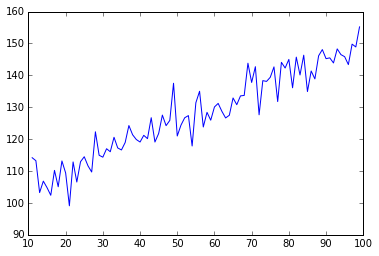

In [5]:
# Select "late" values, i.e. with t>10
xHigh = x[t>10]
tHigh = t[t>10]

# Plot the "late" data
plot(tHigh, xHigh)

In [6]:
# Determine the best-fit line
# To do so, you have to generate a so-called Design Matrix, with "time" in the first
# column, and a column of "1" in the second column:
xMat = vstack((tHigh, ones(len(tHigh)))).T
slope, intercept = linalg.lstsq(xMat, xHigh)[0]

Fit line: intercept = 100.399, and slope = 0.499


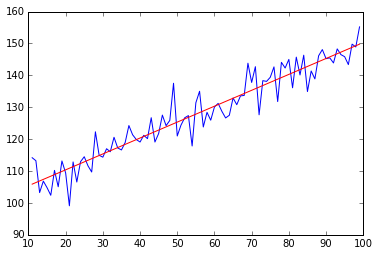

In [7]:
# Show and plot the fit, and save it to a PNG-file with a medium resolution.
# The "modern" way of Python-formatting is used
plot(tHigh, xHigh)
plot(tHigh, intercept + slope*tHigh, 'r')
savefig('linefit.png', dpi=200)
print('Fit line: intercept = {0:5.3f}, and slope = {1:5.3f}'.format(intercept, slope))

# Pandas

In [8]:
# If you want to know confidence intervals, best switch to "pandas"
# Pandas is mainly used for statistics and worksheet-like data
import pandas

# Note that this is an advanced topic, and requires new data structures
# such ad "DataFrames" and "ordinary-least-squares" or "ols-models".
myDict = {'x':tHigh, 'y':xHigh}
df = pandas.DataFrame(myDict)
model = pandas.ols(y=df['y'], x=df['x'])
print(model)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         89
Number of Degrees of Freedom:   2

R-squared:         0.9027
Adj R-squared:     0.9016

Rmse:              4.2547

F-stat (1, 87):   807.5220, p-value:     0.0000

Degrees of Freedom: model 1, resid 87

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.4989     0.0176      28.42     0.0000     0.4645     0.5333
     intercept   100.3990     1.0657      94.21     0.0000    98.3103   102.4877
---------------------------------End of Summary---------------------------------



In [9]:
import sys
print(sys.version)

3.4.3 (v3.4.3:9b73f1c3e601, Feb 24 2015, 22:43:06) [MSC v.1600 32 bit (Intel)]


# More Python Info on the Web

[http://scipy-lectures.github.com/](http://scipy-lectures.github.com/) Python Scientifc Lecture Notes. **If you read nothing else, read this!**

[http://wiki.scipy.org/NumPy_for_Matlab_Users/](http://wiki.scipy.org/NumPy_for_Matlab_Users/) Start here if you have lots of Matlab experience.

[https://docs.python.org/3.4/tutorial/](https://docs.python.org/3.4/tutorial/) The Python tutorial. The original introduction.

[http://jrjohansson.github.com/](http://jrjohansson.github.com/) Lectures on scientic computing with Python. Great ipython notebooks!